In [4]:
import pandas as pd 
data = pd.read_csv('wine.csv')

In [15]:
data.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [13]:
data['taster_name'].nunique()

19

In [18]:
data['price'].max()

3300.0

In [32]:
data.shape

(129971, 13)

In [67]:
mask = data['points']>1

In [68]:
data[mask]['points'].value_counts()

88     17207
87     16933
90     15410
86     12600
89     12226
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [72]:
data[data.duplicated()].shape

(9983, 13)

In [73]:
mask = data.duplicated(subset=data.columns) # маска для фильтрации
data_duplicates = data[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 9983


In [85]:
data_vv = data.drop_duplicates(subset= data.columns)

In [90]:
data_vv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


In [92]:
import seaborn as sns

<AxesSubplot:>

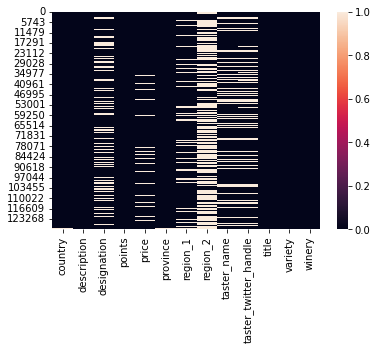

In [93]:
sns.heatmap(data_vv.isnull())

In [94]:
data_vv = data_vv.drop(['region_2'], axis=1)

<AxesSubplot:>

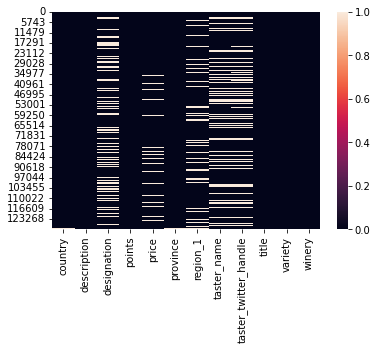

In [95]:
sns.heatmap(data_vv.isnull())

In [99]:
data_vv.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,119929,119988,85443,119988.000000,111593.000000,119929,100428,95071,90542,119988,119987,119988
unique,43,119955,37979,NaN,NaN,425,1229,19,15,118840,707,16757
top,US,This opens with subtle aromas of wild flower a...,Reserve,NaN,NaN,California,Napa Valley,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,1871,NaN,NaN,33656,4174,23560,23560,9,12278,211
mean,NaN,NaN,NaN,88.442236,35.620747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.092915,42.103728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

data_vv['designation'] = data_vv['designation'].fillna('unknown')
data_vv['region_1'] = data_vv['region_1'].fillna('unknown')
data_vv['taster_name'] = data_vv['taster_name'].fillna('unknown')
data_vv['taster_twitter_handle'] = data_vv['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
data_vv['country'] = data_vv['country'].fillna('US')
data_vv['price'] = data_vv['price'].fillna(data_vv['price'].mean())
data_vv['province'] = data_vv['province'].fillna('California')
data_vv['variety'] = data_vv['variety'].fillna('Pinot Noir')

In [101]:
data_vv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119988 non-null  object 
 1   description            119988 non-null  object 
 2   designation            119988 non-null  object 
 3   points                 119988 non-null  int64  
 4   price                  119988 non-null  float64
 5   province               119988 non-null  object 
 6   region_1               119988 non-null  object 
 7   taster_name            119988 non-null  object 
 8   taster_twitter_handle  119988 non-null  object 
 9   title                  119988 non-null  object 
 10  variety                119988 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [ ]:
# В задании не понятно с каким файлом работать. В котором остались дубликаты или нет.